In [1]:
import numpy as np
import diplib as dip
import matplotlib.pyplot as plt

PyDIPjavaio unavailable:
libjvm.so: cannot open shared object file: No such file or directory

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


<h3>Part: 2.1.1</h3>
<h4>Computing histograms of base images</h4>

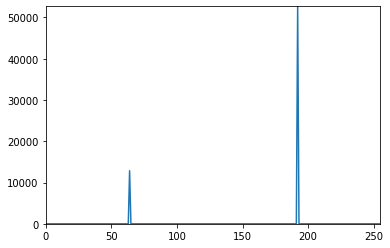

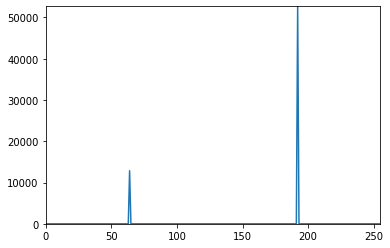

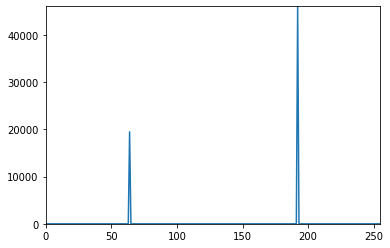

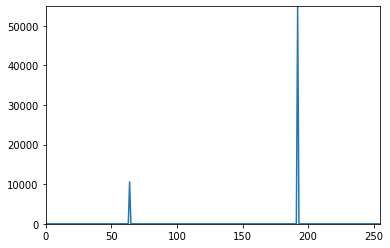

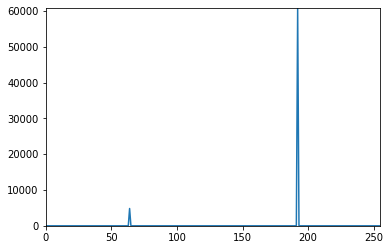

In [2]:
rect1 = dip.ImageReadTIFF("data/rect1.tif")
rect1_arr = np.array(rect1)
hist1 = dip.Histogram(rect1)

rect2 = dip.ImageReadTIFF("data/rect2.tif")
hist2 = dip.Histogram(rect2)

rect3 = dip.ImageReadTIFF("data/rect3.tif")
hist3 = dip.Histogram(rect3)

rect4 = dip.ImageReadTIFF("data/rect4.tif")
hist4 = dip.Histogram(rect4)


hist1.Show()
hist1.Show()
hist2.Show()
hist3.Show()
hist4.Show()

<h3>Part 2.1.2. - 2.1.3</h3>
<h4>Measuring the area  and perimeter of the objects for each image</h4>

Looking at the histograms above, we notice that a good threshold value to divide pixels lies between 100 and 150. We will use intensity = 100 for our experiments.

In [3]:
rectangles = {'rect1': rect1, 'rect2': rect2, 'rect3': rect3, 'rect4': rect4}
threshold = 100

def area_and_perimeters(img, threshold):
    """ This function returns the area, perimeter and standard deviations for the input image
    """
    b = img < threshold # pixels in the threshold
    b = dip.EdgeObjectsRemove(b)
    b = dip.Label(b, minSize=30)
    m = dip.MeasurementTool.Measure(b, img, ['Perimeter', 'Size'])

    # Calculating the average and standard deviation of the objects in the figure 
    areas = []
    perimeters = []
    for i in range(1,m.NumberOfObjects()+1):
        areas.append(m["Size"][i])
        perimeters.append(m["Perimeter"][i])

    avg_perim = np.mean(perimeters)
    std_perim = np.std(perimeters)
    avg_area = np.mean(areas)
    std_area = np.std(areas)
    return avg_perim, std_perim, avg_area, std_area

In [4]:
# This is used as a simple test to check our approach below.
# As we can see the value of the area for the first image is the same, so our aproach should be correct.
np_area = rect1[rect1 < 100]
print(f"Area of rect1.tif calculated with numpy: {len(np_area)}, should be same as below.")

Area of rect1.tif calculated with numpy: 12848, should be same as below.


In [19]:
# Printing results for exercises 2.1.1 and 2.1.2
print()
print("Statistics for area and perimeter of each image:")
print()
for rect in rectangles:
    perim, std_perim, area, std_area = area_and_perimeters(rectangles[rect], threshold)
    print(f"{rect}.tif \t| avg area: {area} \t| area std: {np.round(std_area, 3)} \t| perimeter: {np.round(perim,3)} \t| perimeter std: {np.round(std_perim, 3)}")
    print("-------------------------------------------------------------------------------------------------------------------")


Statistics for area and perimeter of each image:

rect1.tif 	| avg area: 12848.0 	| area std: 0.0 	| perimeter: 457.498 	| perimeter std: 0.0
-------------------------------------------------------------------------------------------------------------------
rect2.tif 	| avg area: 3247.5 	| area std: 28.826 	| perimeter: 233.811 	| perimeter std: 1.863
-------------------------------------------------------------------------------------------------------------------
rect3.tif 	| avg area: 1324.125 	| area std: 19.554 	| perimeter: 147.581 	| perimeter std: 1.8
-------------------------------------------------------------------------------------------------------------------
rect4.tif 	| avg area: 483.0 	| area std: 10.798 	| perimeter: 92.823 	| perimeter std: 1.255
-------------------------------------------------------------------------------------------------------------------


<h3>Part 2.1</h3>
<h4>Relative error</h4>

In this section we observe the relative discretization error, defined as the square root of the mean size against the coeficient of variation (CV = standard deviation/mean) 

Text(0, 0.5, 'Coeficient of variation')

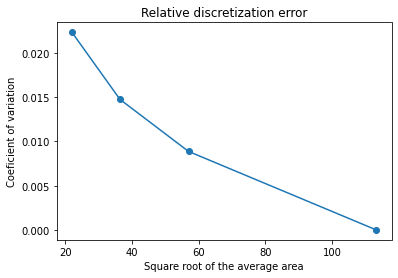

In [30]:
avg_areas = []
std_areas = []
for rect in rectangles:
    _, _, avg_area, std_area = area_and_perimeters(rectangles[rect], threshold)
    avg_areas.append(avg_area)
    std_areas.append(std_area)

coef_variation = np.divide(std_areas, avg_areas)

plt.scatter(x=np.sqrt(avg_areas), y=coef_variation)
plt.plot(np.sqrt(avg_areas),coef_variation)
plt.title("Relative discretization error")
plt.xlabel("Square root of the average area")
plt.ylabel("Coeficient of variation")

From the plot above we can deduce that the relative error diminishes with increasing size of the objects, as expected.